In [17]:
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter
from matplotlib import pyplot as plt
from scipy.ndimage.filters import correlate
Epsilon = 1e-7
DPI = 120
RADIUS = 2
THICKNESS = 2
COLOR = [255,0,0]

### load image and compute the gradient

In [18]:
# TODO 
input_img = cv2.imread('inputs/I1.jpg', 0) / 255

# Rotate the image by 90 degrees
#input_img = cv2.rotate(input_img, cv2.ROTATE_90_CLOCKWISE)
#dx, dy = np.gradient(input_img)
dx = cv2.Sobel(input_img, cv2.CV_64F, 1, 0)
dy = cv2.Sobel(input_img, cv2.CV_64F, 0, 1)

### Compute structure tensor

In [19]:
# TODO 
Ixx = gaussian_filter(dx**2, sigma=RADIUS)
Ixy = gaussian_filter(dx*dy, sigma=RADIUS)
Iyy = gaussian_filter(dy**2, sigma=RADIUS)

### Compute Shi-Thomasi response and Harris response, please compare them in the end

In [20]:
from numpy import linalg as LA
# TODO 
k = 0.05

response_shitomasi = np.minimum(Ixx, Iyy)
response_harris = (Ixx * Iyy - Ixy**2) - k*(Ixx + Iyy)**2

### Visualise the response map

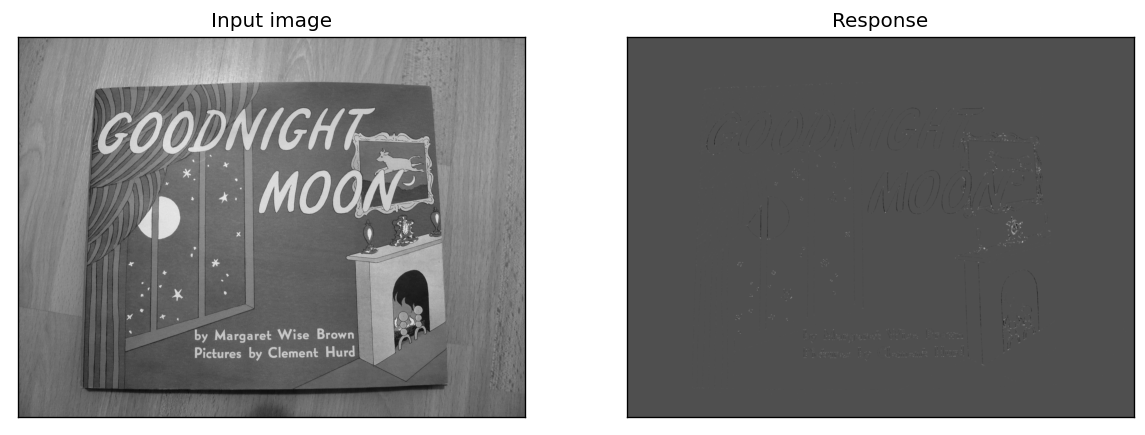

In [21]:
# choose either Shi-Tomasi or Harris response
# TODO 
response = response_harris

plt.figure(figsize=(12, 12),dpi=DPI)
plt.subplot(121)
plt.xticks([]), plt.yticks([])
plt.imshow(input_img, cmap = 'gray')
plt.title('Input image')

plt.subplot(122)
plt.xticks([]), plt.yticks([])
plt.imshow(response, cmap=plt.cm.gray)
plt.title('Response')
plt.show()

### Plot the histogram of responses

(array([7.606088e+06, 1.189000e+04, 3.505000e+03, 1.227000e+03,
        5.010000e+02, 2.290000e+02, 1.140000e+02, 5.800000e+01,
        2.200000e+01, 5.000000e+00]),
 array([2.48771040e-11, 3.06571239e-03, 6.13142476e-03, 9.19713713e-03,
        1.22628495e-02, 1.53285619e-02, 1.83942742e-02, 2.14599866e-02,
        2.45256990e-02, 2.75914113e-02, 3.06571237e-02]),
 <BarContainer object of 10 artists>)

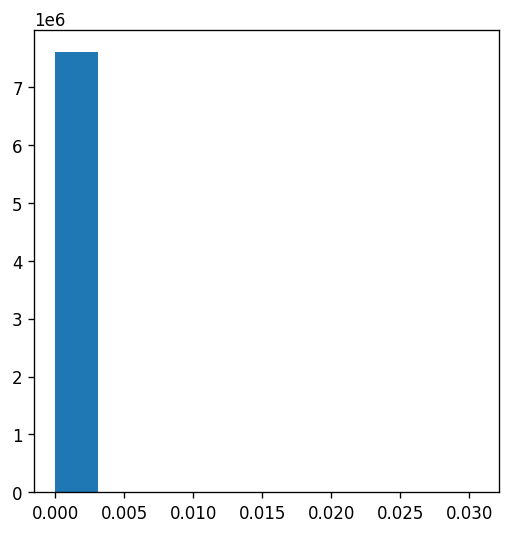

In [22]:
plt.figure(figsize=(5,5), dpi=DPI)
plt.hist(response.flatten()[response.flatten()>0])

### Threshold the corners and visualise it

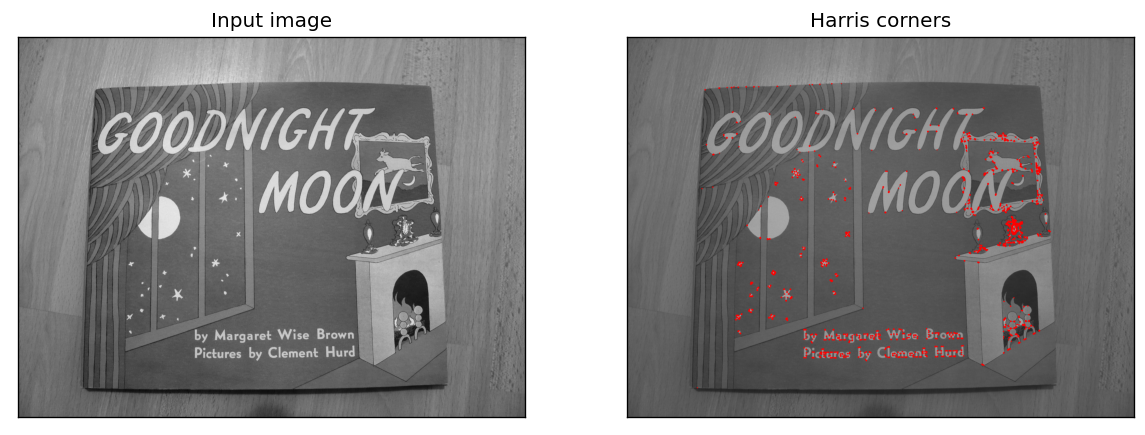

In [23]:
# TODO 
threshold = 0.0025

corners =  cv2.cvtColor((input_img.copy() * 255).astype(np.uint8), cv2.COLOR_GRAY2RGB)
mask = response > threshold

x, y = np.where(mask)
for idx in range(len(x)):
    cv2.circle(corners, (y[idx],x[idx]), RADIUS, COLOR, THICKNESS)

plt.figure(figsize=(12, 12),dpi=DPI)
plt.subplot(121)
plt.xticks([]), plt.yticks([])
plt.imshow((input_img * 255).astype(np.uint8), cmap = 'gray')
plt.title('Input image')

plt.subplot(122)
plt.xticks([]), plt.yticks([])
plt.imshow(corners)
plt.title('Harris corners')
plt.show()

### Apply NMS

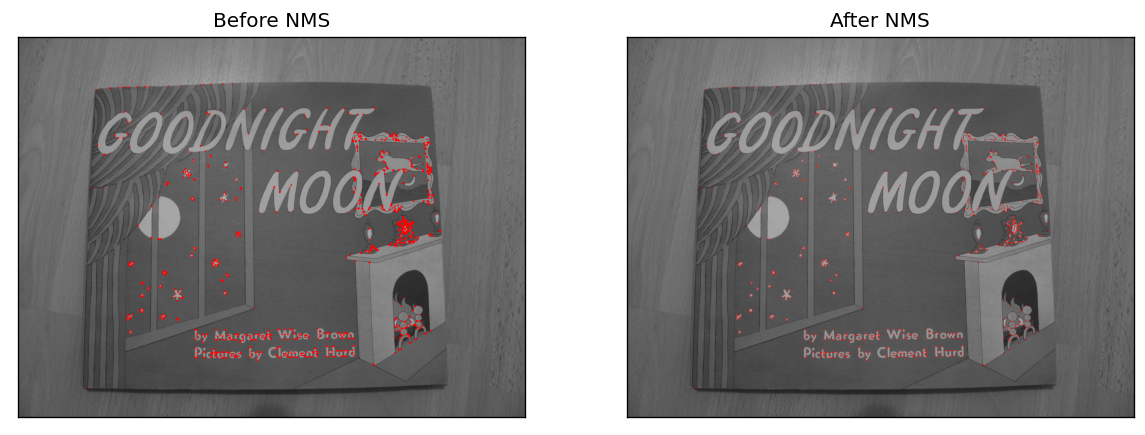

In [24]:
from scipy.ndimage import maximum_filter
# TODO
mask = response > threshold

# Apply non-maximum suppression
mask = mask & (response == maximum_filter(response, footprint=np.ones((3, 3))))

corners_filter =  cv2.cvtColor((input_img.copy() * 255).astype(np.uint8), cv2.COLOR_GRAY2RGB)
x, y = np.where(mask)
for idx in range(len(x)):
    cv2.circle(corners_filter, (y[idx],x[idx]), RADIUS, COLOR, THICKNESS)

plt.figure(figsize=(12, 12),dpi=DPI)
plt.subplot(121)
plt.xticks([]), plt.yticks([])
plt.imshow(corners)
plt.title('Before NMS')

plt.subplot(122)
plt.xticks([]), plt.yticks([])
plt.imshow(corners_filter)
plt.title('After NMS')
plt.show()